In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os.path import basename, dirname
from shutil import copyfile

import json
import pickle
from collections import OrderedDict

import torch

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [4]:
import numpy as np

In [5]:
os.chdir("..")

In [6]:
from da.clust_utils import cramers_corrected_stat, flatten_dict, kmeans_train, kmeans_predict

In [7]:
np.random.seed(21)

In [12]:
model_name  = 'concat60'

# NMT sent clusters

Corr k: 0.6948180356871073
col_0              0       1       2       3
row_0                                       
EMEA           87476    4999    5172  312893
Europarl        6680  446613   44640    2233
JRC-Acquis     98987  370022    5045   25966
OpenSubtitles  59508   13907  426241    1220


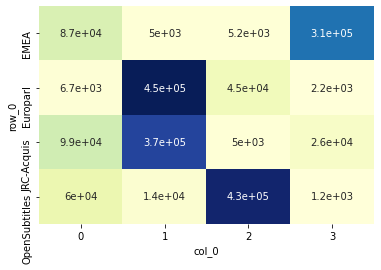

Corr k: 0.741079470183595
col_0            0     1     2     3
row_0                               
EMEA           304    53    48  2943
Europarl         5  3470   235     6
JRC-Acquis     151  2715    38   101
OpenSubtitles  151    91  2798     4


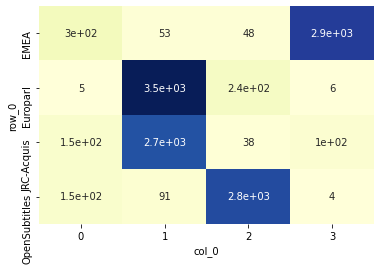

Corr k: 0.7339679418290467
col_0            0     1     2     3
row_0                               
EMEA           262    69    30  2954
Europarl        10  2810   264    23
JRC-Acquis      89  2940    29   132
OpenSubtitles  126   132  2821     6


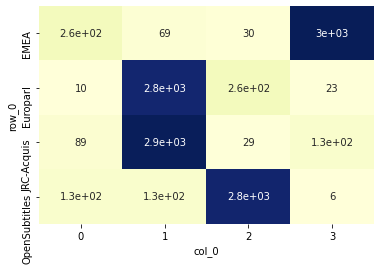

In [23]:
import matplotlib.pyplot as plt

with open(f"experiments/en_et_{model_name}/internals-docs/kmeans_train_sent.pkl", 'rb') as f:
    kmeans = pickle.load(f)
    
savedir = f"experiments/en_et_{model_name}/nmt-clusters-sent"
if not os.path.isdir(savedir):
    os.mkdir(savedir)

for split in ['train', 'dev-cl', 'test-cl']:
    fn = f"experiments/en_et_{model_name}/internals-docs/sent_means_{split}.pkl"
    with open(fn, 'rb') as f:
        data_encoded = pickle.load(f)
    
    labels_hat, labels_true = kmeans_predict(kmeans, data_encoded, split=='train')
    
    conf_matrix = pd.crosstab(labels_true, labels_hat)
    corr_k = cramers_corrected_stat(conf_matrix)

    print(f"Corr k: {corr_k}")
    print(conf_matrix)
    
    i = 0
    for domain_name, v in data_encoded.items():
        fn = f"{domain_name}.{split}.clust.nmt.sent"
        np.savetxt(f"{savedir}/{fn}", labels_hat[i:i+len(v)].astype(int), fmt="%i")
        i += len(v)

    sns.heatmap(conf_matrix,
                cmap="YlGnBu", annot=True, cbar=False)
    plt.show()

# NMT doc clusters

Corr k: 0.9949626561782315
col_0               0       1       2       3
row_0                                        
EMEA                0     162  410365      13
Europarl          118  499635       7     406
JRC-Acquis          0    6019     484  493517
OpenSubtitles  500540     336       0       0


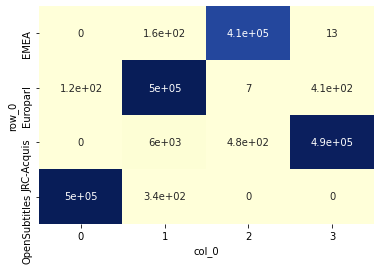

Corr k: 0.8917470817592663
col_0             0     1     2     3
row_0                                
EMEA             54   142  3102    50
Europarl        115  3573     1    27
JRC-Acquis       26   438    54  2487
OpenSubtitles  2820   219     4     1


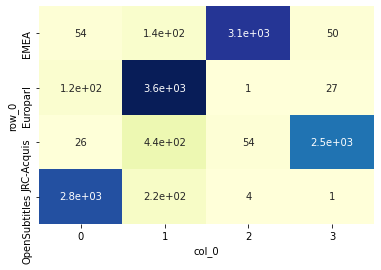

Corr k: 0.8836198579814191
col_0             0     1     2     3
row_0                                
EMEA             32    92  3127    64
Europarl        121  2933    12    41
JRC-Acquis       19   460    46  2665
OpenSubtitles  2796   268    16     5


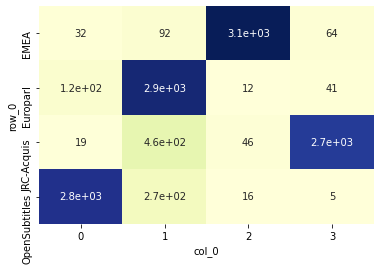

In [24]:
import matplotlib.pyplot as plt

with open(f"experiments/en_et_{model_name}/internals-docs/kmeans_train_doc.pkl", 'rb') as f:
    kmeans = pickle.load(f)
    
savedir = f"experiments/en_et_{model_name}/nmt-clusters-sent"
if not os.path.isdir(savedir):
    os.mkdir(savedir)

for split in ['train', 'dev-cl', 'test-cl']:
    fn = f"experiments/en_et_{model_name}/internals-docs/sent_means_{split}.pkl"
    with open(fn, 'rb') as f:
        data_encoded = pickle.load(f)
    
    labels_hat, labels_true = kmeans_predict(kmeans, data_encoded, split=='train')
    
    conf_matrix = pd.crosstab(labels_true, labels_hat)
    corr_k = cramers_corrected_stat(conf_matrix)

    print(f"Corr k: {corr_k}")
    print(conf_matrix)
    
    i = 0
    for domain_name, v in data_encoded.items():
        fn = f"{domain_name}.{split}.clust.nmt.sent"
        np.savetxt(f"{savedir}/{fn}", labels_hat[i:i+len(v)].astype(int), fmt="%i")
        i += len(v)

    sns.heatmap(conf_matrix,
                cmap="YlGnBu", annot=True, cbar=False)
    plt.show()

# Bert sent clusters

0.24168047830449288
col_0               0       1      2       3
row_0                                       
EMEA            72707  140991  39598  157244
Europarl       166334  177192  56586  100054
JRC-Acquis     162534  163134  29920  144432
OpenSubtitles   46245   50394  84391  319846


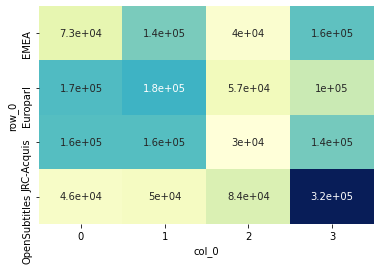

In [29]:
labels_bert = {}
domain_names = ["Europarl", "OpenSubtitles", "JRC-Acquis", "EMEA"]
for domain_name in domain_names:
    fn = f"experiments/data-clust/clusters/cl-{domain_name}.en-et.docs.train.clusters_sent_4.txt" # TODO: change to train
    with open(fn) as f:
        labels_bert[domain_name] = [int(l[:-1]) for l in f.readlines()]
        
        
labels_bert_all = []
labels_bert_all_true = []
for k,v in labels_bert.items():
    labels_bert_all.extend(v)
    labels_bert_all_true.extend([k] * len(v))
    
    
    
conf_matrix = pd.crosstab(np.array(labels_bert_all_true), np.array(labels_bert_all))
corr_k = cramers_corrected_stat(conf_matrix)
print(corr_k)
print(conf_matrix)


sns.heatmap(conf_matrix,
            cmap="YlGnBu", annot=True, cbar=False)

plt.show()

# Bert doc clusters

0.8089680719230101
col_0               0       1       2       3
row_0                                        
EMEA            42870  344373    3200   20097
Europarl          521    3372  493821    2452
JRC-Acquis     279334  152902   61959    5825
OpenSubtitles    1001    9881     899  489095


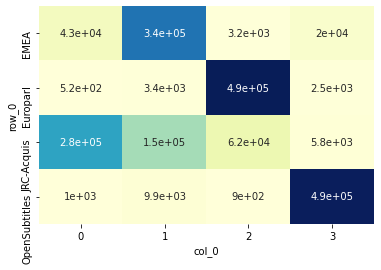

In [30]:
labels_bert = {}
domain_names = ["Europarl", "OpenSubtitles", "JRC-Acquis", "EMEA"]
for domain_name in domain_names:
    fn = f"experiments/data-clust/clusters/cl-{domain_name}.en-et.docs.train.clusters_doc_4.txt" # TODO: change to train
    with open(fn) as f:
        labels_bert[domain_name] = [int(l[:-1]) for l in f.readlines()]
        
        
labels_bert_all = []
labels_bert_all_true = []
for k,v in labels_bert.items():
    labels_bert_all.extend(v)
    labels_bert_all_true.extend([k] * len(v))
    
    
    
conf_matrix = pd.crosstab(np.array(labels_bert_all_true), np.array(labels_bert_all))
corr_k = cramers_corrected_stat(conf_matrix)
print(corr_k)
print(conf_matrix)


sns.heatmap(conf_matrix,
            cmap="YlGnBu", annot=True, cbar=False)

plt.show()

# Rand clusters

0.0
col_0               0       1       2       3
row_0                                        
EMEA           102637  102486  103091  102326
Europarl       125243  124939  125168  124816
JRC-Acquis     124737  124908  125027  125348
OpenSubtitles  124879  125620  125679  124698


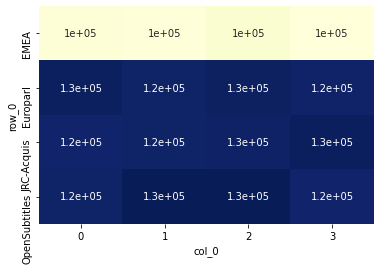

In [31]:
from random import sample

labels_rand = {}
domain_names = ["Europarl", "OpenSubtitles", "JRC-Acquis", "EMEA"]
for domain_name in domain_names:
    fn = f"experiments/data-clust-new/clusters/cl-{domain_name}.en-et.docs.train.clusters_doc_4.txt" # TODO: change to train
    with open(fn) as f:
        labels_rand[domain_name] = [sample([0,1,2,3], 1)[0] for l in f.readlines()]
        
        
labels_rand_all = []
labels_rand_all_true = []
for k,v in labels_rand.items():
    labels_rand_all.extend(v)
    labels_rand_all_true.extend([k] * len(v))
    
    
conf_matrix = pd.crosstab(np.array(labels_rand_all_true), np.array(labels_rand_all))
corr_k = cramers_corrected_stat(conf_matrix)
print(corr_k)
print(conf_matrix)


sns.heatmap(conf_matrix,
            cmap="YlGnBu", annot=True, cbar=False)

plt.show()